# The regression ensemble

In [7]:
def load_dataset(name):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')
    datas=pd.read_csv(name)
    print(datas.isnull().sum())
    print(datas.head())
    x=datas.iloc[:,:-1].values
    y=datas.iloc[:,-1].values
    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

   # fig, ax = plt.subplots(figsize=(22, 16))
    #plt.plot(x_train[:,0],x_train[:,1],"r")
    #plt.plot(x_test[:,0],x_test[:,1],"b")
    #plt.xlabel('FIRST FEATURE')
    #plt.ylabel('SECOND FEATURE')
    
    return x_train, x_test, y_train, y_test

In [8]:
x_train, x_test, y_train, y_test=load_dataset("Boston.csv")

num        0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64
   num     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
def rmse(predictions, targets):
    import numpy as np
    differences = predictions - targets      

    differences_squared = differences ** 2                    

    mean_of_differences_squared = differences_squared.mean()  

    rmse_val = np.sqrt(mean_of_differences_squared)           

    return rmse_val   


## predictions for the test data set using the following six regression methods: 



In [20]:
def random_forest(x_train, x_test, y_train, y_test):
    import pandas as pd
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import cross_val_score
    import numpy as np
     #application of an iterative way to find the optimal estimator for the optimal performance of the method in our data.
     # The selection was made based on the smallest mean squared error.
    import math
    from math import sqrt
    from sklearn.metrics import mean_squared_error
    rmse_val = []
    for K in range(50):
        K = K+1
        re= RandomForestRegressor(n_estimators = K , random_state=0)

        re.fit(x_train,y_train)  #fit the model
        pred=re.predict(x_test) #make prediction on test set
        error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        print('RMSE value for k= ' , K , 'is:', error)



    ##diagram of each mean squared error for each estimator
    curve = pd.DataFrame(rmse_val) 
    curve.plot()


# we found that the value of the estimator that gives the smallest mean squared error is 46
    import numpy
    from sklearn.metrics import mean_absolute_error
    list_1=[]
    rmse_rf=[]
    mae_rf=[]
    accuracy=[]
    for i in range(1,20):

        re= RandomForestRegressor(n_estimators = 46 , min_samples_leaf=i,random_state=0)
        re.fit(x_train,y_train)
        scores = cross_val_score(re, x_train, y_train, cv=5)
        accuracy.append(scores.mean())

        pred=re.predict(x_test) #make prediction on test set
        error_rmse=rmse(pred, y_test)
        error_mae=mean_absolute_error(y_test, pred)
        mae_rf.append(error_mae)
        rmse_rf.append(error_rmse) #store rmse values

    print("accuracy: ",sum(accuracy)/len(accuracy))
    print("mae for random forest regression",sum(mae_rf) / len(mae_rf))  
    print("rmse for random forest regression",sum(rmse_rf) / len(rmse_rf))    
        #y_pr = re.predict((x_test))
        # we chose r squared as a measure to evaluate the performance of each method
         # R ^ 2 is a statistical measure of the percentage of variance for a dependent variable explained by 
         #an independent variable or variables in regression mode.
       # from sklearn import metrics
        #score1 = metrics.r2_score(y_test,y_pr)
        #score1
    return mae_rf,rmse_rf

RMSE value for k=  1 is: 4.695492206236055
RMSE value for k=  2 is: 3.5252103260851335
RMSE value for k=  3 is: 3.458493381602491
RMSE value for k=  4 is: 3.8136734773911702
RMSE value for k=  5 is: 3.910451054671365
RMSE value for k=  6 is: 3.6083580506029005
RMSE value for k=  7 is: 3.582910115807985
RMSE value for k=  8 is: 3.71304647889193
RMSE value for k=  9 is: 3.586540845441515
RMSE value for k=  10 is: 3.678027097960717
RMSE value for k=  11 is: 3.7306874276126907
RMSE value for k=  12 is: 3.6388401184178734
RMSE value for k=  13 is: 3.57782315667417
RMSE value for k=  14 is: 3.461179192784133
RMSE value for k=  15 is: 3.2924014320162245
RMSE value for k=  16 is: 3.276106846899826
RMSE value for k=  17 is: 3.2267828171740316
RMSE value for k=  18 is: 3.218070065354974
RMSE value for k=  19 is: 3.2496226326081006
RMSE value for k=  20 is: 3.2508284766061903
RMSE value for k=  21 is: 3.230291545502222
RMSE value for k=  22 is: 3.1975745598740386
RMSE value for k=  23 is: 3.18788

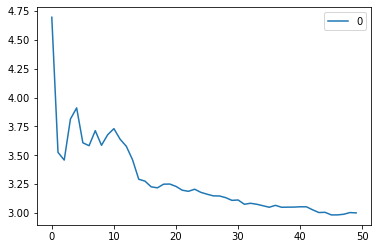

In [21]:
mae_rf,rmse_rf = random_forest(x_train, x_test, y_train, y_test)

In [22]:
def gpr(x_train, x_test, y_train, y_test):
    
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
    from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error


    rmse_rf=[]
    mae_rf=[]
    kernel = C(1.0,(.1,10))+ C(1.0,(.1,10)) * RBF(10,(.1,100))+ WhiteKernel(5, (.5,50) )
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gpr.fit(x_train, y_train)
    scores = cross_val_score(gpr, x_train, y_train, cv=5)
    y_pr = gpr.predict((x_test))
    rmse_gpr=rmse(y_pr, y_test)
    mae_gpr=mean_absolute_error(y_test, y_pr)
    print("rmse for gaussian regression",rmse_gpr)
    print("mae for gaussian regression",mae_gpr)
    print("scores of cross validation:",scores)
    print("accuracy of gaussion regression: ",scores.mean())
    
    return mae_gpr,rmse_gpr

In [23]:
mae_gpr,rmse_gpr = gpr(x_train, x_test, y_train, y_test)

rmse for gaussian regression 7.421037125010805
mae for gaussian regression 4.90020174780674
scores of cross validation: [0.43815203 0.40584445 0.4969146  0.29624834 0.39828498]
accuracy of gaussion regression:  0.4070888808741264


In [30]:
def ridge(x_train, x_test, y_train, y_test):
    from sklearn.metrics import mean_absolute_error
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import cross_val_score
    list_1 = [0.001,0.01,0.1,1,10]
    rmse_ridge=[] 
    mae_ridge=[]
    accuracy=[]
    for i in range(0, len(list_1)) :
        clf = Ridge(alpha=i)
        clf.fit(x_train, y_train)
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        accuracy.append(scores.mean())
        y_pr = clf.predict(x_test)
        error_rmse=rmse(y_pr, y_test)
        rmse_ridge.append(error_rmse)
        error_mae=mean_absolute_error(y_test, y_pr)
        mae_ridge.append(error_mae)

        #y_pr = clf.predict((x_test))
        #score3 = metrics.r2_score(y_test,y_pr)
        #score3
    print("scores of cross validation: ",accuracy) 
    print("accuracy of ridge regression",sum(accuracy)/len(accuracy))
    print("rmse for ridge regression:",sum(rmse_ridge) / len(rmse_ridge)) 
    print("mae for ridge regression:",sum(mae_ridge) / len(mae_ridge)) 
    
    return mae_ridge,rmse_ridge


In [31]:
mae_ridge,rmse_ridge = ridge(x_train, x_test, y_train, y_test)

scores of cross validation:  [0.7033270885445654, 0.6997862782412771, 0.6968873083567823, 0.695203228126568, 0.6941451774198983]
accuracy of ridge regression 0.6978698161378182
rmse for ridge regression: 4.826446260134809
mae for ridge regression: 3.7042080450296675


In [38]:
def knn_regr(x_train, x_test, y_train, y_test):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error
    #KNN regression
    from sklearn.neighbors import NearestNeighbors,KNeighborsRegressor

    #code to find the optimal k based on mean squared error.
    import math
    from math import sqrt
    from sklearn.metrics import mean_squared_error
    rmse_val = []
    for K in range(19):
        K = K+1
        knn = KNeighborsRegressor(K)

        knn.fit(x_train,y_train)  #fit the model
        pred=knn.predict(x_test) #make prediction on test set
        error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        print('RMSE value for k= ' , K , 'is:', error)

    curve = pd.DataFrame(rmse_val) 
    curve.plot()    


    rmse_knn=[] 
    mae_knn=[]


    knn = KNeighborsRegressor(3)
    knn.fit(x_train,y_train)  #fit the model
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    print(scores)

    y_pr = knn.predict((x_test))
    error_rmse=rmse(y_pr, y_test)
    rmse_knn.append(error_rmse)
    error_mae=mean_absolute_error(y_test, y_pr)
    mae_knn.append(error_mae)

    print("rmse for ridge regression:",sum(rmse_knn) / len(rmse_knn)) 
    print("mae for ridge regression:",sum(mae_knn) / len(mae_knn)) 

    #y_predict = knn.predict(x_test)
    #score4 = metrics.r2_score(y_test,y_predict)
    #score4
    
    return mae_knn,rmse_knn

RMSE value for k=  1 is: 7.378326767116847
RMSE value for k=  2 is: 6.60875644616337
RMSE value for k=  3 is: 6.036321615788664
RMSE value for k=  4 is: 6.118597594188381
RMSE value for k=  5 is: 6.260538096274311
RMSE value for k=  6 is: 6.331047058958345
RMSE value for k=  7 is: 6.551695038931014
RMSE value for k=  8 is: 6.49142392382623
RMSE value for k=  9 is: 6.568484075869437
RMSE value for k=  10 is: 6.694528055236824
RMSE value for k=  11 is: 6.872739061944635
RMSE value for k=  12 is: 7.101420774412015
RMSE value for k=  13 is: 7.233755560911977
RMSE value for k=  14 is: 7.324692515606321
RMSE value for k=  15 is: 7.352703176976112
RMSE value for k=  16 is: 7.40324275010024
RMSE value for k=  17 is: 7.432489698222719
RMSE value for k=  18 is: 7.466632321252318
RMSE value for k=  19 is: 7.579612955953311
[0.49482001 0.50666524 0.54203907 0.61485019 0.61911609]
rmse for ridge regression: 6.036321615788664
mae for ridge regression: 4.003594771241831


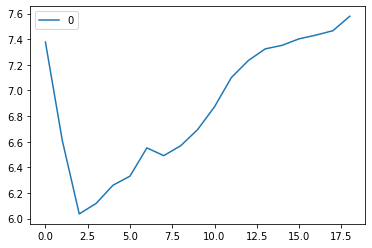

In [39]:
mae_knn,rmse_knn=knn_regr(x_train, x_test, y_train, y_test)

In [41]:
def mlp(x_train, x_test, y_train, y_test):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error
    
    from sklearn.neural_network import MLPRegressor
    from sklearn import metrics

    rmse_mlp=[] 
    mae_mlp=[]
    accuracy=[]

    list_1 = [1,5,10,20,50,100]
    #if we use the sigmoid function as our  activation function, we do not have an efficient model.
    #the same for tanh
    #as learning rate i used the default value, and max_iter=700
    #if we choose as solver=lbfgs we take imbalanced results from negative to too good(75%)
    for i in list_1:
        print(i)
        regr = MLPRegressor(hidden_layer_sizes=i, activation='tanh', solver='lbfgs',alpha=0.01,learning_rate_init=0.001,max_iter=50000)
        regr.fit(x_train, y_train)
        scores = cross_val_score(regr, x_train, y_train, cv=5)
        accuracy.append(scores.mean())
        y_pr = regr.predict((x_test))
        error_rmse=rmse(y_pr, y_test)
        rmse_mlp.append(error_rmse)
        error_mae=mean_absolute_error(y_test, y_pr)
        mae_mlp.append(error_mae)


    print("scores of cross validation: ",accuracy) 
    print("accuracy of ridge regression",sum(accuracy)/len(accuracy))    
    print("rmse for ridge regression:",sum(rmse_mlp) / len(rmse_mlp)) 
    print("mae for ridge regression:",sum(mae_mlp) / len(mae_mlp))     
    #y_predict = regr.predict(x_test)
    #score5 = metrics.r2_score(y_test,y_predict)
    #score5
    
    return mae_mlp,rmse_mlp

In [42]:
mae_mlp,rmse_mlp = mlp(x_train, x_test, y_train, y_test)

1
5
10
20
50
100
scores of cross validation:  [0.02842737444569503, 0.13624474017055235, 0.0703259080172101, 0.32414391760855654, 0.6807355989856628, 0.6931991698485334]
accuracy of ridge regression 0.3221794515127017
rmse for ridge regression: 6.712332278852487
mae for ridge regression: 4.80167710980202


In [43]:
#the calculation of the mean squared error and the mean absolute error executed in problem 2 


## The same for the diabetes dataset

In [9]:
x_train, x_test, y_train, y_test=load_dataset("diabetes.csv")


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [122]:
def random_forest_clf(x_train, x_test, y_train, y_test):
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    import numpy as np
     #application of an iterative way to find the optimal estimator for the optimal performance of the method in our data.
     # The selection was made based on the smallest mean squared error.
    import math
    from math import sqrt
    from sklearn.metrics import mean_squared_error
    rmse_val = []
    for K in range(50):
        K = K+1
        re= RandomForestClassifier(n_estimators = K , random_state=0)

        re.fit(x_train,y_train)  #fit the model
        pred=re.predict(x_test) #make prediction on test set
        error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        print('RMSE value for k= ' , K , 'is:', error)



## diagram of each mean squared error for each estimator
    curve = pd.DataFrame(rmse_val) 
    curve.plot()


# we found that the value of the estimator that gives the smallest mean squared error is 46
    import numpy
    from sklearn.metrics import mean_absolute_error
    list_1=[]
    rmse_rf=[]
    mae_rf=[]
    accuracy=[]
    for i in range(1,20):

        re= RandomForestClassifier(n_estimators = 8 , min_samples_leaf=i,random_state=0)
        re.fit(x_train,y_train)
        scores = cross_val_score(re, x_train, y_train, cv=5)
        accuracy.append(scores.mean())

        pred=re.predict(x_test) #make prediction on test set
        error_rmse=rmse(pred, y_test)
        error_mae=mean_absolute_error(y_test, pred)
        mae_rf.append(error_mae)
        rmse_rf.append(error_rmse) #store rmse values

    print("accuracy: ",sum(accuracy)/len(accuracy))
    print("mae for random forest classification",sum(mae_rf) / len(mae_rf))  
    print("rmse for random forest classification",sum(rmse_rf) / len(rmse_rf))    
        #y_pr = re.predict((x_test))
        # we chose r squared as a measure to evaluate the performance of each method
         # R ^ 2 is a statistical measure of the percentage of variance for a dependent variable
         # explained by an independent variable or variables in regression mode.
       # from sklearn import metrics
        #score1 = metrics.r2_score(y_test,y_pr)
        #score1
    return mae_rf,rmse_rf

In [65]:
def gpr_clf(x_train, x_test, y_train, y_test):
    
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
    from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error


    rmse_rf=[]
    mae_rf=[]
    kernel = C(1.0,(.1,10))+ C(1.0,(.1,10)) * RBF(10,(.1,100))+ WhiteKernel(5, (.5,50) )
    gpr = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=9)
    gpr.fit(x_train, y_train)
    scores = cross_val_score(gpr, x_train, y_train, cv=5)
    y_pr = gpr.predict((x_test))
    rmse_gpr=rmse(y_pr, y_test)
    mae_gpr=mean_absolute_error(y_test, y_pr)
    print("rmse for gaussian classification",rmse_gpr)
    print("mae for gaussian classification",mae_gpr)
    print("scores of cross validation:",scores)
    print("accuracy of gaussion regression: ",scores.mean())
    
    return mae_gpr,rmse_gpr

In [68]:
def ridge_clf(x_train, x_test, y_train, y_test):
    from sklearn.metrics import mean_absolute_error
    from sklearn.linear_model import RidgeClassifier
    from sklearn.model_selection import cross_val_score
    list_1 = [0.001,0.01,0.1,1,10]
    rmse_ridge=[] 
    mae_ridge=[]
    accuracy=[]
    for i in range(0, len(list_1)) :
        clf = RidgeClassifier(alpha=i)
        clf.fit(x_train, y_train)
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        accuracy.append(scores.mean())
        y_pr = clf.predict(x_test)
        error_rmse=rmse(y_pr, y_test)
        rmse_ridge.append(error_rmse)
        error_mae=mean_absolute_error(y_test, y_pr)
        mae_ridge.append(error_mae)

        #y_pr = clf.predict((x_test))
        #score3 = metrics.r2_score(y_test,y_pr)
        #score3
    print("scores of cross validation: ",accuracy) 
    print("accuracy of ridge classification",sum(accuracy)/len(accuracy))
    print("rmse for ridge classification:",sum(rmse_ridge) / len(rmse_ridge)) 
    print("mae for ridge classification:",sum(mae_ridge) / len(mae_ridge)) 
    
    return mae_ridge,rmse_ridge

In [136]:
def knn_clf(x_train, x_test, y_train, y_test):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error
    #Εφαρμογή πσλινδρόμισης KNN
    from sklearn.neighbors import KNeighborsClassifier

#code to find the optimal k based on mean squared error.
    import math
    from math import sqrt
    from sklearn.metrics import mean_squared_error
    rmse_val = []
    for K in range(19):
        K = K+1
        knn = KNeighborsClassifier(K)

        knn.fit(x_train,y_train)  #fit the model
        pred=knn.predict(x_test) #make prediction on test set
        error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        print('RMSE value for k= ' , K , 'is:', error)

    curve = pd.DataFrame(rmse_val) 
    curve.plot()    


    rmse_knn=[] 
    mae_knn=[]


    knn = KNeighborsClassifier(8)
    knn.fit(x_train,y_train)  #fit the model
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    print(scores)

    y_pr = knn.predict((x_test))
    error_rmse=rmse(y_pr, y_test)
    rmse_knn.append(error_rmse)
    error_mae=mean_absolute_error(y_test, y_pr)
    mae_knn.append(error_mae)
    
    
    print("scores of cross validation: ",scores) 
    print("accuracy of r classification",sum(scores)/len(scores))
    print("rmse for knn classification:",sum(rmse_knn) / len(rmse_knn)) 
    print("mae for knn classification:",sum(mae_knn) / len(mae_knn)) 

    #y_predict = knn.predict(x_test)
    #score4 = metrics.r2_score(y_test,y_predict)
    #score4
    
    return mae_knn,rmse_knn

In [70]:
def mlp_clf(x_train, x_test, y_train, y_test):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error
    
    from sklearn.neural_network import MLPClassifier
    from sklearn import metrics

    rmse_mlp=[] 
    mae_mlp=[]
    accuracy=[]

    list_1 = [1,5,10,20,50,100]
    #if we use the sigmoid function as our  activation function, we do not have an efficient model.
    #the same for tanh
    #as learning rate i used the default value, and max_iter=700
    #if we choose as solver=lbfgs we take imbalanced results from negative to too good(75%)
    for i in list_1:
        print(i)
        regr = MLPClassifier(hidden_layer_sizes=i, activation='tanh', solver='lbfgs',alpha=0.01,learning_rate_init=0.001,max_iter=50000)
        regr.fit(x_train, y_train)
        scores = cross_val_score(regr, x_train, y_train, cv=5)
        accuracy.append(scores.mean())
        y_pr = regr.predict((x_test))
        error_rmse=rmse(y_pr, y_test)
        rmse_mlp.append(error_rmse)
        error_mae=mean_absolute_error(y_test, y_pr)
        mae_mlp.append(error_mae)


    print("scores of cross validation: ",accuracy) 
    print("accuracy of mlp classification",sum(accuracy)/len(accuracy))    
    print("rmse for mlp classification:",sum(rmse_mlp) / len(rmse_mlp)) 
    print("mae for mlp classification:",sum(mae_mlp) / len(mae_mlp))     
    #y_predict = regr.predict(x_test)
    #score5 = metrics.r2_score(y_test,y_predict)
    #score5
    
    return mae_mlp,rmse_mlp

RMSE value for k=  1 is: 0.5345224838248488
RMSE value for k=  2 is: 0.5032362797401965
RMSE value for k=  3 is: 0.496742636335202
RMSE value for k=  4 is: 0.5032362797401965
RMSE value for k=  5 is: 0.4901629731627434
RMSE value for k=  6 is: 0.4901629731627434
RMSE value for k=  7 is: 0.4698714938993648
RMSE value for k=  8 is: 0.4413674147523748
RMSE value for k=  9 is: 0.4629100498862757
RMSE value for k=  10 is: 0.4558423058385518
RMSE value for k=  11 is: 0.4558423058385518
RMSE value for k=  12 is: 0.4558423058385518
RMSE value for k=  13 is: 0.44866323818505716
RMSE value for k=  14 is: 0.4698714938993648
RMSE value for k=  15 is: 0.4629100498862757
RMSE value for k=  16 is: 0.4629100498862757
RMSE value for k=  17 is: 0.44866323818505716
RMSE value for k=  18 is: 0.4558423058385518
RMSE value for k=  19 is: 0.4413674147523748
RMSE value for k=  20 is: 0.4558423058385518
RMSE value for k=  21 is: 0.4629100498862757
RMSE value for k=  22 is: 0.4698714938993648
RMSE value for k= 

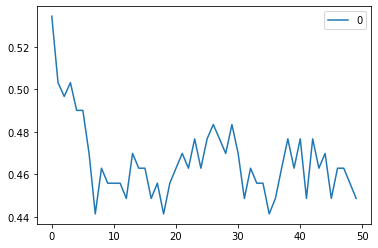

In [108]:
mae_rf,rmse_rf = random_forest_clf(x_train, x_test, y_train, y_test)

In [109]:
mae_gpr,rmse_gpr = gpr_clf(x_train, x_test, y_train, y_test)

rmse for gaussian classification 0.4629100498862757
mae for gaussian classification 0.21428571428571427
scores of cross validation: [0.76422764 0.80487805 0.70731707 0.73170732 0.77868852]
accuracy of gaussion regression:  0.7573637211781954


In [110]:
mae_ridge,rmse_ridge = ridge_clf(x_train, x_test, y_train, y_test)

scores of cross validation:  [0.7719978675196588, 0.7719978675196588, 0.7719978675196588, 0.7703718512594963, 0.7719978675196588]
accuracy of ridge classification 0.7716726642676264
rmse for ridge classification: 0.4698714938993648
mae for ridge classification: 0.2207792207792208


RMSE value for k=  1 is: 0.5284134548067254
RMSE value for k=  2 is: 0.5222329678670935
RMSE value for k=  3 is: 0.5096471914376255
RMSE value for k=  4 is: 0.5284134548067254
RMSE value for k=  5 is: 0.515978455203089
RMSE value for k=  6 is: 0.4767312946227962
RMSE value for k=  7 is: 0.4901629731627434
RMSE value for k=  8 is: 0.48349377841522817
RMSE value for k=  9 is: 0.48349377841522817
RMSE value for k=  10 is: 0.4901629731627434
RMSE value for k=  11 is: 0.5032362797401965
RMSE value for k=  12 is: 0.4767312946227962
RMSE value for k=  13 is: 0.48349377841522817
RMSE value for k=  14 is: 0.4767312946227962
RMSE value for k=  15 is: 0.4629100498862757
RMSE value for k=  16 is: 0.4629100498862757
RMSE value for k=  17 is: 0.4629100498862757
RMSE value for k=  18 is: 0.4767312946227962
RMSE value for k=  19 is: 0.4767312946227962
[0.72357724 0.68292683 0.70731707 0.74796748 0.77868852]
scores of cross validation:  [0.72357724 0.68292683 0.70731707 0.74796748 0.77868852]
accuracy 

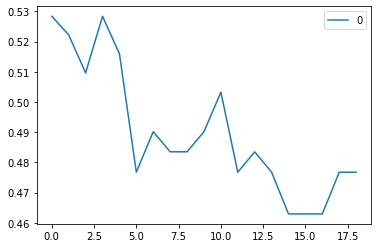

In [114]:
mae_knn,rmse_knn=knn_clf(x_train, x_test, y_train, y_test)

In [73]:
mae_mlp,rmse_mlp = mlp_clf(x_train, x_test, y_train, y_test)

1
5
10
20
50
100
scores of cross validation:  [0.643342662934826, 0.6679328268692524, 0.6644942023190723, 0.6856857257097161, 0.6287351725976277, 0.6727309076369453]
accuracy of mlp classification 0.6604869163445732
rmse for mlp classification: 0.5449685051543759
mae for mlp classification: 0.30411255411255406


## The same for the iris  dataset

In [10]:
from sklearn.datasets import load_iris
datas=load_iris()
x=datas.data
y=datas.target

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

#fig, ax = plt.subplots(figsize=(22, 16))
#plt.plot(x_train[:,0],x_train[:,1],"r")
#plt.plot(x_test[:,0],x_test[:,1],"b")
#plt.xlabel('FIRST FEATURE')
#plt.ylabel('SECOND FEATURE')


RMSE value for k=  1 is: 0.18257418583505536
RMSE value for k=  2 is: 0.18257418583505536
RMSE value for k=  3 is: 0.18257418583505536
RMSE value for k=  4 is: 0.18257418583505536
RMSE value for k=  5 is: 0.18257418583505536
RMSE value for k=  6 is: 0.18257418583505536
RMSE value for k=  7 is: 0.18257418583505536
RMSE value for k=  8 is: 0.18257418583505536
RMSE value for k=  9 is: 0.18257418583505536
RMSE value for k=  10 is: 0.18257418583505536
RMSE value for k=  11 is: 0.18257418583505536
RMSE value for k=  12 is: 0.18257418583505536
RMSE value for k=  13 is: 0.18257418583505536
RMSE value for k=  14 is: 0.18257418583505536
RMSE value for k=  15 is: 0.18257418583505536
RMSE value for k=  16 is: 0.18257418583505536
RMSE value for k=  17 is: 0.18257418583505536
RMSE value for k=  18 is: 0.18257418583505536
RMSE value for k=  19 is: 0.18257418583505536
RMSE value for k=  20 is: 0.18257418583505536
RMSE value for k=  21 is: 0.18257418583505536
RMSE value for k=  22 is: 0.182574185835055

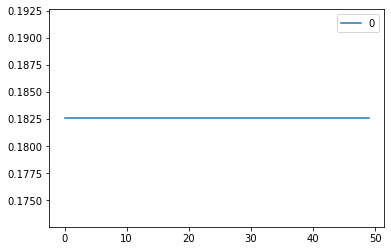

In [124]:
mae_rf,rmse_rf = random_forest_clf(x_train, x_test, y_train, y_test)

In [125]:
mae_gpr,rmse_gpr = gpr_clf(x_train, x_test, y_train, y_test)

rmse for gaussian classification 0.18257418583505536
mae for gaussian classification 0.03333333333333333
scores of cross validation: [1.         0.95833333 0.95833333 0.95833333 0.95833333]
accuracy of gaussion regression:  0.9666666666666668


In [126]:
mae_ridge,rmse_ridge = ridge_clf(x_train, x_test, y_train, y_test)

scores of cross validation:  [0.8, 0.825, 0.825, 0.825, 0.8333333333333334]
accuracy of ridge classification 0.8216666666666667
rmse for ridge classification: 0.48971626913058286
mae for ridge classification: 0.24


RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.0
RMSE value for k=  3 is: 0.0
RMSE value for k=  4 is: 0.0
RMSE value for k=  5 is: 0.0
RMSE value for k=  6 is: 0.0
RMSE value for k=  7 is: 0.18257418583505536
RMSE value for k=  8 is: 0.0
RMSE value for k=  9 is: 0.18257418583505536
RMSE value for k=  10 is: 0.18257418583505536
RMSE value for k=  11 is: 0.18257418583505536
RMSE value for k=  12 is: 0.18257418583505536
RMSE value for k=  13 is: 0.18257418583505536
RMSE value for k=  14 is: 0.18257418583505536
RMSE value for k=  15 is: 0.18257418583505536
RMSE value for k=  16 is: 0.18257418583505536
RMSE value for k=  17 is: 0.18257418583505536
RMSE value for k=  18 is: 0.18257418583505536
RMSE value for k=  19 is: 0.18257418583505536
[0.95833333 0.95833333 0.95833333 0.95833333 0.875     ]
scores of cross validation:  [0.95833333 0.95833333 0.95833333 0.95833333 0.875     ]
accuracy of r classification 0.9416666666666668
rmse for knn classification: 0.0
mae for knn classificat

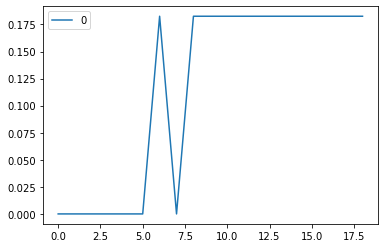

In [129]:
mae_knn,rmse_knn=knn_clf(x_train, x_test, y_train, y_test)

In [130]:
mae_mlp,rmse_mlp = mlp_clf(x_train, x_test, y_train, y_test)

1
5
10
20
50
100
scores of cross validation:  [0.8583333333333334, 0.9333333333333333, 0.9166666666666667, 0.9166666666666667, 0.9166666666666667, 0.9166666666666667]
accuracy of mlp classification 0.9097222222222223
rmse for mlp classification: 0.1217161238900369
mae for mlp classification: 0.022222222222222223


## Wine  dataset

In [131]:
from sklearn.datasets import load_wine
datas=load_wine()
x=datas.data
y=datas.target


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

#fig, ax = plt.subplots(figsize=(22, 16))
#plt.plot(x_train[:,0],x_train[:,1],"r")
#plt.plot(x_test[:,0],x_test[:,1],"b")
#plt.xlabel('FIRST FEATURE')
#plt.ylabel('SECOND FEATURE')

RMSE value for k=  1 is: 0.37267799624996495
RMSE value for k=  2 is: 0.5527707983925667
RMSE value for k=  3 is: 0.408248290463863
RMSE value for k=  4 is: 0.23570226039551584
RMSE value for k=  5 is: 0.28867513459481287
RMSE value for k=  6 is: 0.23570226039551584
RMSE value for k=  7 is: 0.23570226039551584
RMSE value for k=  8 is: 0.16666666666666666
RMSE value for k=  9 is: 0.16666666666666666
RMSE value for k=  10 is: 0.16666666666666666
RMSE value for k=  11 is: 0.16666666666666666
RMSE value for k=  12 is: 0.16666666666666666
RMSE value for k=  13 is: 0.16666666666666666
RMSE value for k=  14 is: 0.16666666666666666
RMSE value for k=  15 is: 0.16666666666666666
RMSE value for k=  16 is: 0.16666666666666666
RMSE value for k=  17 is: 0.16666666666666666
RMSE value for k=  18 is: 0.16666666666666666
RMSE value for k=  19 is: 0.16666666666666666
RMSE value for k=  20 is: 0.16666666666666666
RMSE value for k=  21 is: 0.16666666666666666
RMSE value for k=  22 is: 0.16666666666666666


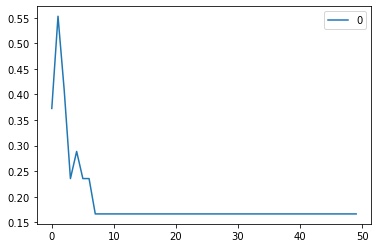

In [133]:
mae_rf,rmse_rf = random_forest_clf(x_train, x_test, y_train, y_test)

In [134]:
mae_gpr,rmse_gpr = gpr_clf(x_train, x_test, y_train, y_test)

rmse for gaussian classification 0.7071067811865476
mae for gaussian classification 0.3333333333333333
scores of cross validation: [0.68965517 0.72413793 0.82142857 0.67857143 0.71428571]
accuracy of gaussion regression:  0.725615763546798


In [135]:
mae_ridge,rmse_ridge = ridge_clf(x_train, x_test, y_train, y_test)

scores of cross validation:  [1.0, 0.9928571428571429, 0.9928571428571429, 0.9928571428571429, 0.9859605911330049]
accuracy of ridge classification 0.9929064039408868
rmse for ridge classification: 0.13333333333333333
mae for ridge classification: 0.02222222222222222


RMSE value for k=  1 is: 0.5773502691896257
RMSE value for k=  2 is: 0.7453559924999299
RMSE value for k=  3 is: 0.7817359599705717
RMSE value for k=  4 is: 0.7453559924999299
RMSE value for k=  5 is: 0.7264831572567789
RMSE value for k=  6 is: 0.7264831572567789
RMSE value for k=  7 is: 0.6871842709362768
RMSE value for k=  8 is: 0.7071067811865476
RMSE value for k=  9 is: 0.5773502691896257
RMSE value for k=  10 is: 0.7637626158259734
RMSE value for k=  11 is: 0.7264831572567789
RMSE value for k=  12 is: 0.6454972243679028
RMSE value for k=  13 is: 0.7264831572567789
RMSE value for k=  14 is: 0.6236095644623235
RMSE value for k=  15 is: 0.6666666666666666
RMSE value for k=  16 is: 0.6666666666666666
RMSE value for k=  17 is: 0.6454972243679028
RMSE value for k=  18 is: 0.6236095644623235
RMSE value for k=  19 is: 0.6454972243679028
[0.62068966 0.65517241 0.75       0.64285714 0.53571429]
scores of cross validation:  [0.62068966 0.65517241 0.75       0.64285714 0.53571429]
accuracy of

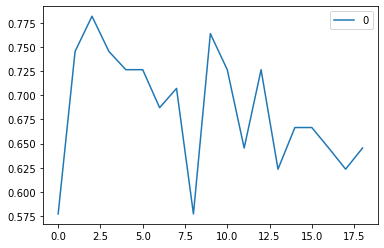

In [137]:
mae_knn,rmse_knn=knn_clf(x_train, x_test, y_train, y_test)

In [138]:
mae_mlp,rmse_mlp = mlp_clf(x_train, x_test, y_train, y_test)

1
5
10
20
50
100
scores of cross validation:  [0.4083743842364532, 0.5775862068965517, 0.5049261083743842, 0.7332512315270936, 0.6083743842364531, 0.9083743842364532]
accuracy of mlp classification 0.6234811165845648
rmse for mlp classification: 0.651807780812592
mae for mlp classification: 0.38425925925925913


## Summary of the results.

\begin{aligned}
&\text { A table summarizing the results  of the the RMSE for all datasets. }\\
&\begin{array}{|l|l|l|l|l|}
\hline \text { Method } & \text { Boston } & \text { Diabetes } & \text { Iris } & \text { Wine } \\
\hline \text { Ridge } & 4.8264 & 0.4698 & 0.4897 & 0.1333 \\
\hline \text { LOWESS } & ? & ? & ? & ? \\
\hline \text { Gaussian Process } & 7.421 & 0.4629 & 0.1825 & 0.7071 \\
\hline \text { Random Forests } & 3.6704 & 0.4547 & 0.1825 & 0.2812 \\
\hline \text { Neural Nets } & 6.7123 & 0.5449 & 0.1217 & 0.6518 \\
\hline \text { K-NN } & 6.0363 & 0.4629 & 0 & 0.7071 \\
\hline
\end{array}
\end{aligned}

\begin{aligned}
&\text { A table summarizing the results of the MAE }\\
&\begin{array}{|l|l|l|l|l|}
\hline \text { Method } & \text { Boston } & \text { Diabetes } & \text { Iris } & \text { Wine } \\
\hline \text { Ridge } & 3.7042 & 0.2207 & 0.24 & 0.0222 \\
\hline \text { LOWESS } & ? & ? & ? & ? \\
\hline \text { Gaussian Process } & 4.9 & 0.2142 & 0.0333 & 0.3333 \\
\hline \text { Random Forests } & 2.778 & 0.2071 & 0.0333 & 0.8187 \\
\hline \text { Neural Nets } & 4.8016 & 0.3041 & 0.022 & 0.3842 \\
\hline \text { K-NN } & 4.0035 & 0.2142 & 0 & 0.3888 \\
\hline
\end{array}
\end{aligned}